# Task 1: Simulate the dynamics of cat qubits at the effective Hamiltonian level.

In Tutorial 1, we have introduced that we can dissipatively stabilize a cat qubit by coupling a memory mode  that will store our cat qubit to a lossy buffer mode with a specific interaction that exchanges two photons of the memory mode with one photon in the buffer mode.

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}]$$

The Hamiltonian of the system is given by
$$\hat{H} = \hat{H}_{\mathrm{2ph}} + \hat{H}_d, \qquad \mathrm{with}$$
$$\hat{H}_{\mathrm{2ph}} = g_2 {\hat{a}^\dagger}^2 \hat{b} + g_2^*\hat{a}^2 \hat{b}^\dagger$$
$$\hat{H}_d = \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger$$

Here, $\hat{H}_{\mathrm{2ph}}$ is the two-photon exchange Hamiltonian and $\hat{H}_d$ is the buffer drive Hamiltonian.

In [6]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np

**Task 1.1: Getting started with `dynamiqs`**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters:

$$g_2=1.0~~~\epsilon_d=-4~~~\kappa_b=10$$

(For now, we pretend that the parameters are without dimensions)

Use an initial state $\lvert \psi_0 \rangle$ in which both the buffer and the memory are in the vacuum. Use a Hilbert-space truncation of $n_a = 20$ and $n_b = 5$ (number of Fock-states in mode a and mode b, respectively) to begin with. You can play with a different Hilbert-space truncation.

Simulate the dynamics for a time $T=4$. 

Plot the wigner function of mode a (as a GIF or as a mosaic plot).

Also plot the expectation value of the number of photons, as well as the photon number parity in the memory mode.


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|██████████| 100.0% ◆ elapsed 4.22s ◆ remaining 0.00ms  

100%|██████████| 50/50 [00:09<00:00,  5.37it/s]


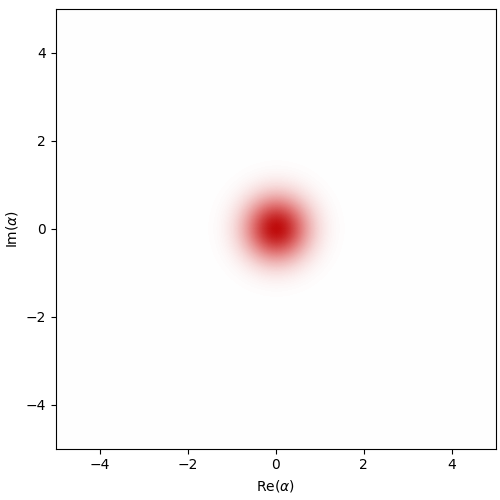

In [24]:
na = 20 # mode a
nb = 5 # mode b

g_2 = 1.0 + 0.0j
epsilon_d = -4+0.0j
kappa_b = 10

a = dq.destroy(na) # annihilaiton operator
b = dq.destroy(nb) # annihilaiton operator
psi0_a = dq.fock(na, 0) # initial state
psi0_b = dq.fock(nb, 0) # initial state
psi0 = dq.tensor(psi0_a, psi0_b) # initial state

a_upgraded = dq.tensor(a, dq.eye(nb))
b_upgraded = dq.tensor(dq.eye(na), b)

H_absorption = g_2 * (a_upgraded.dag() @ a_upgraded.dag() @ b_upgraded) + g_2.conjugate() * (a_upgraded @ a_upgraded @ b_upgraded.dag()) 
H_bdrive = epsilon_d.conjugate() * b_upgraded + epsilon_d * b_upgraded.dag() 
H = H_absorption + H_bdrive

tsave = np.linspace(0, 10, 100)
# loss_op = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na)) # loss operator
res = dq.mesolve(H, [kappa_b * b_upgraded], psi0, tsave)
new_res_states = dq.ptrace(res.states, keep=0)
gif_file = dq.plot.wigner_gif(new_res_states) 

(20,)